In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
X_train = pd.read_csv('.\Training Data\Diabetes_XTrain.csv')
y_train = pd.read_csv('.\Training Data\Diabetes_YTrain.csv')

In [16]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [20]:
y_train.head()
type(y_train)

pandas.core.frame.DataFrame

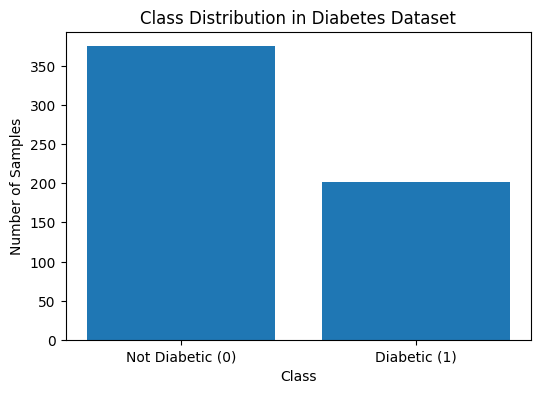

In [21]:
class_counts = y_train['Outcome'].value_counts().sort_index()

x = class_counts.index.astype(int)   # 🔑 convert tuples/objects → int
y = class_counts.values

plt.figure(figsize=(6, 4))
plt.bar(x, y)
plt.xticks([0, 1], ['Not Diabetic (0)', 'Diabetic (1)'])
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Diabetes Dataset")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)


In [24]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [25]:
(X_train == 0).sum()


Pregnancies                  56
Glucose                       2
BloodPressure                23
SkinThickness               140
Insulin                     229
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [26]:
((X_train == 0).mean() * 100).round(2)


Pregnancies                 12.17
Glucose                      0.43
BloodPressure                5.00
SkinThickness               30.43
Insulin                     49.78
BMI                          1.52
DiabetesPedigreeFunction     0.00
Age                          0.00
dtype: float64

In [27]:
len(X_train)

460

In [28]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 433 to 93
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               460 non-null    int64  
 1   Glucose                   460 non-null    int64  
 2   BloodPressure             460 non-null    int64  
 3   SkinThickness             460 non-null    int64  
 4   Insulin                   460 non-null    int64  
 5   BMI                       460 non-null    float64
 6   DiabetesPedigreeFunction  460 non-null    float64
 7   Age                       460 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.3 KB


In [29]:
X_train.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,3.839130,119.945652,69.004348,20.208696,74.356522,31.677174,0.480685,33.300000
std,3.306459,31.128227,20.356303,16.005443,108.045717,8.058256,0.342968,12.071916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.575000,0.246750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,14.500000,31.600000,0.370500,29.000000
75%,6.000000,139.000000,80.000000,33.000000,117.000000,36.725000,0.640000,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [30]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

X_train[cols_with_zero] = X_train[cols_with_zero].replace(0, np.nan)
X_test[cols_with_zero] = X_test[cols_with_zero].replace(0, np.nan)

In [31]:
X_train[cols_with_zero].isna().sum()


Glucose            2
BloodPressure     23
SkinThickness    140
Insulin          229
BMI                7
dtype: int64

In [32]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,460.000000,458.000000,437.000000,320.000000,231.000000,453.000000,460.000000,460.000000
mean,3.839130,120.469432,72.636156,29.050000,148.069264,32.166667,0.480685,33.300000
std,3.306459,30.165701,13.108505,10.533601,111.062828,7.082439,0.342968,12.071916
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,99.000000,64.000000,21.000000,73.000000,26.900000,0.246750,24.000000
50%,3.000000,116.500000,72.000000,28.500000,116.000000,31.900000,0.370500,29.000000
75%,6.000000,139.000000,80.000000,37.000000,182.000000,36.800000,0.640000,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


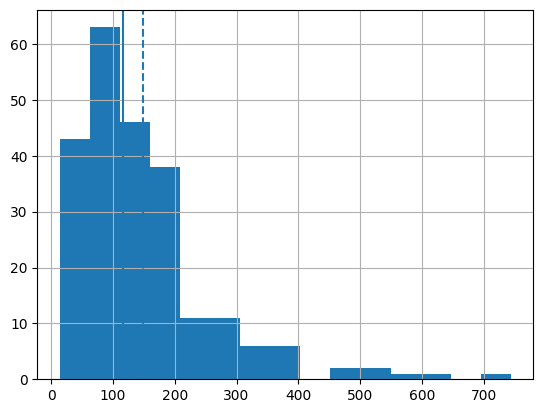

In [43]:
col = 'Insulin'
X_train[col].hist(bins=15)

plt.axvline(X_train[col].mean(), linestyle='--')
plt.axvline(X_train[col].median(), linestyle='-')
plt.show()

In [37]:
X_train.median()

Pregnancies                   3.0000
Glucose                     116.5000
BloodPressure                72.0000
SkinThickness                28.5000
Insulin                     116.0000
BMI                          31.9000
DiabetesPedigreeFunction      0.3705
Age                          29.0000
dtype: float64

In [38]:
X_train.mean()

Pregnancies                   3.839130
Glucose                     120.469432
BloodPressure                72.636156
SkinThickness                29.050000
Insulin                     148.069264
BMI                          32.166667
DiabetesPedigreeFunction      0.480685
Age                          33.300000
dtype: float64

In [41]:
X_train.std()

Pregnancies                   3.306459
Glucose                      30.165701
BloodPressure                13.108505
SkinThickness                10.533601
Insulin                     111.062828
BMI                           7.082439
DiabetesPedigreeFunction      0.342968
Age                          12.071916
dtype: float64

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=7,weights="distance"))
])


In [116]:
X_train.agg(['min', 'max'])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
min,0,44.0,24.0,7.0,14.0,18.2,0.084,21
max,17,199.0,122.0,63.0,744.0,67.1,2.420,81


In [117]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_tr_scaled.min(axis=0), X_tr_scaled.max(axis=0)
X_tr_scaled_df = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
X_tr_scaled_df.agg(['min', 'max'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
min,-1.162364,-2.537751,-3.714527,-2.096580,-1.209769,-1.974194,-1.157881,-1.020003
max,3.984685,2.606153,3.770104,3.228067,5.377360,4.937841,5.660656,3.955622


In [118]:
pipe.fit(X_train, y_train)
val_preds = pipe.predict(X_test)


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [119]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, val_preds)


0.7327586206896551

In [122]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# fit on train split
pipe.fit(X_train, y_train)

# get probability scores (not class labels)
y_val_proba = pipe.predict_proba(X_test)[:, 1]

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_val_proba)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.787171052631579


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


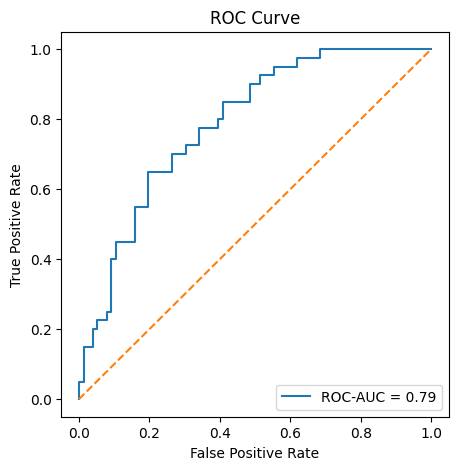

In [123]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_val_proba)

# Plot
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc_score(y_test, y_val_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [111]:
for k in [3,5,7,9,11,13]:
    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k,weights="distance"))
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    print(k, accuracy_score(y_test, preds))


3 0.7155172413793104
5 0.7241379310344828
7 0.7327586206896551
9 0.7327586206896551
11 0.7241379310344828
13 0.7155172413793104


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = {"knn__n_neighbors": [3,5,7,9,11,13]}

gs = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)

best_k = gs.best_params_["knn__n_neighbors"]
best_cv_score = gs.best_score_
print(best_cv_score,best_k)
best_pipe = gs.best_estimator_
val_preds = best_pipe.predict(X_test)
accuracy_score(y_test, val_preds)


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

0.7478260869565216 13


0.7155172413793104

In [120]:
pipe.fit(X_train, y_train)
val_preds = pipe.predict(X_test)
accuracy_score(y_test, val_preds)

C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7327586206896551

In [101]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_stats(k):
    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k,weights="distance"))
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="accuracy")
    return scores.mean(), scores.std(), scores

mean_7, std_7, scores_7 = cv_stats(7)
mean_13, std_13, scores_13 = cv_stats(13)

print("k=7  -> mean CV acc:", round(mean_7, 4), " | std:", round(std_7, 4), " | scores:", scores_7)
print("k=13 -> mean CV acc:", round(mean_13, 4), " | std:", round(std_13, 4), " | scores:", scores_13)

C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

k=7  -> mean CV acc: 0.7565  | std: 0.0404  | scores: [0.80434783 0.75       0.7826087  0.76086957 0.68478261]
k=13 -> mean CV acc: 0.7457  | std: 0.0244  | scores: [0.76086957 0.76086957 0.77173913 0.70652174 0.72826087]


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [102]:
#Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipe_lr = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_scores = cross_val_score(pipe_lr, X_train, y_train, cv=cv, scoring="accuracy")

print("Logistic Regression CV mean:", lr_scores.mean())
print("Logistic Regression CV std :", lr_scores.std())
pipe_lr.fit(X_train, y_train)
val_preds = pipe_lr.predict(X_test)
print(accuracy_score(y_test, val_preds))


Logistic Regression CV mean: 0.7782608695652173
Logistic Regression CV std : 0.04792479931532305
0.75


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    # scaler not required for RF, but keeping pipeline consistent is fine
    ("rf", RandomForestClassifier(
        n_estimators=200,
        min_samples_split = 2,
        random_state=42,
        n_jobs=-1
    ))
])

rf_scores = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring="accuracy")

print("Random Forest CV mean:", rf_scores.mean())
print("Random Forest CV std :", rf_scores.std())
pipe_rf.fit(X_train, y_train)
val_preds = pipe_rf.predict(X_test)
print(accuracy_score(y_test, val_preds))

C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

Random Forest CV mean: 0.7782608695652173
Random Forest CV std : 0.04742918310711182


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7413793103448276


In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "rf__n_estimators": [200, 300, 500],
    "rf__max_depth": [None, 5, 10, 20],
    "rf__min_samples_split": [2, 5, 10]
}

gs = GridSearchCV(pipe_rf, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
gs.fit(X_train, y_train)

print("Best RF params:", gs.best_params_)
print("Best RF CV acc :", gs.best_score_)


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best RF params: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best RF CV acc : 0.7782608695652173
